In [4]:
import pandas as pd
!pip install tqdm
from tqdm import tqdm

In [11]:
import numpy as np
snow = np.loadtxt('St_31510.dat', unpack = True)
df = pd.read_csv('fixed_data.csv')
df = df[~(df['Timestamp'] > '2020-12-31')]
snow_high = []
snow_level = []
snow_Q1 = []
snow_Q2 = []
snow_Q3 = []
for date in tqdm(df['Timestamp']):
    year = int(date[0:4])
    month = int(date[5:7])
    day = int(date[8:10])
    for i in range(len(snow[0])):
        if day <= snow[3][i] and month == snow[2][i] and year == snow[1][i]:
            snow_high.append(snow[4][i])
            snow_level.append(snow[5][i])
            snow_Q1.append(snow[6][i])
            snow_Q2.append(snow[7][i])
            snow_Q3.append(snow[8][i])
            break
        if  month < snow[2][i] and year == snow[1][i]:
            snow_high.append(snow[4][i])
            snow_level.append(snow[5][i])
            snow_Q1.append(snow[6][i])
            snow_Q2.append(snow[7][i])
            snow_Q2.append(snow[8][i])
            break
        if  year < snow[1][i]:
            snow_high.append(snow[4][i])
            snow_level.append(snow[5][i])
            snow_Q1.append(snow[6][i])
            snow_Q2.append(snow[7][i])
            snow_Q3.append(snow[8][i])
            break
df['snow_high'] = snow_high
df['snow_level'] = snow_level
df['snow_Q1'] = snow_Q1
df['snow_Q2'] = snow_Q2
df['snow_Q3'] = snow_Q3
df = df.drop(['snow_Q2', 'snow_Q3'], axis=1)
df.describe()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4749/4749 [05:08<00:00, 15.40it/s]


,Value-1002-zeya-malayasazanka,Value-1003-zeya-svobodny,Value-2366-zeya-blagoveshensk,Value-316-zeya-mazanovo,Value-317-zeya-belogorye,snow_high,snow_level,snow_Q1
count,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000
mean,441.883554,162.507054,136.020636,177.291219,331.305538,3.794694,3.524110,0.674668
std,100.167537,95.945752,111.778965,87.568861,82.665378,7.131554,4.616563,0.556868
min,241.000000,-18.000000,-81.000000,-3.000000,173.000000,0.000000,0.000000,0.000000
25%,383.000000,110.000000,61.000000,120.000000,277.000000,0.000000,0.000000,0.000000
50%,422.000000,144.000000,115.000000,161.000000,318.000000,0.000000,0.000000,1.000000
75%,484.000000,196.000000,191.000000,218.000000,367.000000,5.000000,10.000000,1.000000
max,1052.000000,810.000000,818.000000,721.000000,818.000000,38.000000,10.000000,3.000000


In [10]:
'''prediction = {}
NUMBER_OF_DAYS = 365
DAYS_TO_PREDICT = 4
df = df.drop(['snow_Q1'], axis=1)
prediction['to_predict' + str(DAYS_TO_PREDICT)] = []
try:
    for collum_name in df:
        print(collum_name)
        if collum_name != 'Timestamp':
            for i in range(NUMBER_OF_DAYS):
                prediction[collum_name + str(i)] = []
            for i in range(len(df[collum_name])):
                if i + NUMBER_OF_DAYS + DAYS_TO_PREDICT>= len(df[collum_name]):
                    break
                counter = 0
                for j in range(i, i + NUMBER_OF_DAYS):
                    prediction[collum_name + str(counter)].append(df[collum_name][j].astype(int))
                    counter += 1
                prediction['to_predict' + str(DAYS_TO_PREDICT)].append(df['Value-2366-zeya-blagoveshensk'][i 
                            + NUMBER_OF_DAYS + DAYS_TO_PREDICT].astype(int) )
except ValueError:
    pass

prediction = pd.DataFrame(prediction)
prediction.head()'''

Timestamp
Value-1002-zeya-malayasazanka
Value-1003-zeya-svobodny
Value-2366-zeya-blagoveshensk
Value-316-zeya-mazanovo
Value-317-zeya-belogorye
snow_high
snow_level


ValueError: All arrays must be of the same length

In [20]:
prediction = {}
NUMBER_OF_DAYS = 365
for i in tqdm(range(NUMBER_OF_DAYS)):
    prediction['Value-1002-zeya-malayasazanka' + str(i)] = []
    prediction['Value-2366-zeya-blagoveshensk' + str(i)] = []
    prediction['Value-1003-zeya-svobodny' + str(i)] = []
    prediction['Value-316-zeya-mazanovo' + str(i)] = []
    prediction['Value-317-zeya-belogorye' + str(i)] = []
    prediction['day_snow_high' + str(i)] = []
    prediction['day_snow_level' + str(i)] = []
    prediction['day_snow_Q1' + str(i)] = []
DAYS_TO_PREDICT = 4
prediction['to_predict' + str(DAYS_TO_PREDICT)] = []
day_couner = 0
counter = 0

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 365/365 [00:00<00:00, 297266.21it/s]


In [21]:
for i in tqdm(range(len(df['snow_high']))):
    if i + NUMBER_OF_DAYS + DAYS_TO_PREDICT>= len(df['snow_high']):
        break
    counter = 0
    for j in range(i, i + NUMBER_OF_DAYS):
        #prediction['day' + str(counter)].append(df['Value'][j].astype(int))
        prediction['day_snow_high' + str(counter)].append(df['snow_high'][j].astype(int))
        prediction['day_snow_level' + str(counter)].append(df['snow_level'][j].astype(int))
        prediction['day_snow_Q1' + str(counter)].append(df['snow_Q1'][j].astype(int))
        prediction['Value-1002-zeya-malayasazanka' + str(counter)].append(df['Value-1002-zeya-malayasazanka'][j].astype(int))
        prediction['Value-2366-zeya-blagoveshensk' + str(counter)].append(df['Value-2366-zeya-blagoveshensk'][j].astype(int))
        prediction['Value-1003-zeya-svobodny' + str(counter)].append(df['Value-1003-zeya-svobodny'][j].astype(int))
        prediction['Value-316-zeya-mazanovo' + str(counter)].append(df['Value-316-zeya-mazanovo'][j].astype(int))
        prediction['Value-317-zeya-belogorye' + str(counter)].append(df['Value-317-zeya-belogorye'][j].astype(int))
        counter += 1
    prediction['to_predict' + str(DAYS_TO_PREDICT)].append(df['Value-2366-zeya-blagoveshensk'][i 
                        + NUMBER_OF_DAYS + DAYS_TO_PREDICT].astype(int) )
prediction = pd.DataFrame(prediction)
prediction.head()
         

 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 4380/4749 [00:56<00:04, 77.24it/s]


,Value-1002-zeya-malayasazanka0,Value-2366-zeya-blagoveshensk0,Value-1003-zeya-svobodny0,Value-316-zeya-mazanovo0,Value-317-zeya-belogorye0,day_snow_high0,day_snow_level0,day_snow_Q10,Value-1002-zeya-malayasazanka1,Value-2366-zeya-blagoveshensk1,...,day_snow_Q1363,Value-1002-zeya-malayasazanka364,Value-2366-zeya-blagoveshensk364,Value-1003-zeya-svobodny364,Value-316-zeya-mazanovo364,Value-317-zeya-belogorye364,day_snow_high364,day_snow_level364,day_snow_Q1364,to_predict4
0,435,148,163,218,341,4,10,0,441,151,...,0,423,147,132,242,345,12,10,0,128
1,441,151,162,222,350,4,10,0,447,157,...,0,423,143,131,239,343,12,10,0,116
2,447,157,161,226,361,4,10,0,447,163,...,0,421,148,129,235,341,12,10,0,120
3,447,163,154,230,367,4,10,0,443,168,...,0,421,140,126,231,340,12,10,0,116
4,443,168,144,222,364,4,10,0,421,166,...,0,419,130,125,230,338,12,10,0,113


In [22]:
from pycaret.regression import *
s = setup(prediction, target = 'to_predict4', normalize = True, use_gpu = True)

,Description,Value
0,session_id,5156
1,Target,to_predict4
2,Original Data,"(4380, 2921)"
3,Missing Values,False
4,Numeric Features,2190
5,Categorical Features,730
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3065, 7665)"


In [23]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,12.3920,444.7095,21.0138,0.9674,0.2742,0.2060,3.0880
et,Extra Trees Regressor,13.2125,571.4178,23.7022,0.9580,0.2777,0.2178,42.3160
lightgbm,Light Gradient Boosting Machine,15.0058,597.7461,24.4088,0.9559,0.3105,0.2599,6.7040
rf,Random Forest Regressor,17.6772,900.5317,29.8945,0.9337,0.3388,0.2930,35.0660
br,Bayesian Ridge,23.9743,1080.2629,32.8198,0.9197,0.4895,0.5205,62.2550
gbr,Gradient Boosting Regressor,22.4564,1110.3141,33.2522,0.9180,0.4195,0.4210,86.3430
par,Passive Aggressive Regressor,25.5791,1184.3871,34.3733,0.9119,0.5315,0.5651,8.2170
ridge,Ridge Regression,25.6308,1184.7013,34.3856,0.9118,0.5321,0.5622,0.4050
lr,Linear Regression,25.9578,1209.0128,34.7371,0.9099,0.5421,0.5719,3.2240
huber,Huber Regressor,24.3678,1323.3217,36.2697,0.9023,0.4963,0.5239,19.0440


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

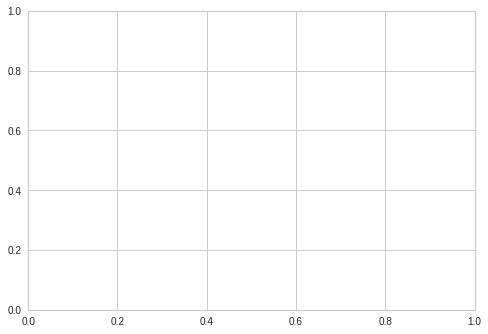

In [24]:
evaluate_model(best)

In [25]:
plot_model(best, plot = 'residuals')

IntProgress(value=0, description='Processing: ', max=5)


KeyboardInterrupt



Error in callback <function flush_figures at 0x7f69714905e0> (for post_execute):



KeyboardInterrupt



In [87]:
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,11.5886,348.1576,18.6590,0.9746,0.2362,0.1531


,day0,day1,day2,day3,day4,day5,day6,day7,day8,day9,...,day357,day358,day359,day360,day361,day362,day363,day364,to_predict4,Label
0,83.0,83.0,81.0,77.0,74.0,75.0,74.0,75.0,76.0,76.0,...,136.0,134.0,133.0,132.0,123.0,121.0,120.0,121.0,104,113.8
1,-38.0,-60.0,-72.0,-73.0,-55.0,-45.0,-42.0,-38.0,-33.0,-24.0,...,-12.0,-22.0,-34.0,-38.0,-35.0,-32.0,-29.0,-24.0,-1,1.2
2,174.0,167.0,156.0,147.0,142.0,140.0,137.0,131.0,124.0,120.0,...,55.0,53.0,54.0,60.0,73.0,86.0,92.0,89.0,67,62.6
3,259.0,266.0,276.0,290.0,314.0,332.0,331.0,312.0,291.0,281.0,...,216.0,196.0,218.0,293.0,297.0,180.0,121.0,123.0,199,180.6
4,119.0,120.0,118.0,117.0,111.0,108.0,116.0,121.0,122.0,128.0,...,19.0,20.0,21.0,25.0,29.0,32.0,33.0,31.0,26,32.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,3.0,-6.0,-11.0,-8.0,-7.0,-11.0,-9.0,-6.0,-4.0,-6.0,...,224.0,218.0,197.0,185.0,180.0,194.0,226.0,253.0,246,234.8
1210,81.0,80.0,79.0,74.0,70.0,71.0,76.0,77.0,79.0,81.0,...,-33.0,-24.0,-11.0,-5.0,-4.0,-2.0,37.0,95.0,128,116.0
1211,240.0,203.0,174.0,150.0,134.0,121.0,115.0,123.0,153.0,189.0,...,57.0,67.0,72.0,75.0,75.0,64.0,57.0,50.0,101,78.4
1212,-2.0,14.0,20.0,22.0,24.0,28.0,42.0,54.0,69.0,84.0,...,273.0,254.0,237.0,231.0,259.0,288.0,278.0,258.0,314,299.0


In [88]:
predictions = predict_model(best, data=prediction)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,8.9858,231.8987,15.2282,0.9832,0.2192,0.1471


,day0,day1,day2,day3,day4,day5,day6,day7,day8,day9,...,day357,day358,day359,day360,day361,day362,day363,day364,to_predict4,Label
0,148,151,157,163,168,166,161,150,139,140,...,158,156,155,152,148,146,147,143,116,109.8
1,151,157,163,168,166,161,150,139,140,144,...,156,155,152,148,146,147,143,148,120,109.8
2,157,163,168,166,161,150,139,140,144,147,...,155,152,148,146,147,143,148,140,116,109.8
3,163,168,166,161,150,139,140,144,147,149,...,152,148,146,147,143,148,140,130,113,109.8
4,168,166,161,150,139,140,144,147,149,148,...,148,146,147,143,148,140,130,128,106,106.4


In [26]:
save_model(best, 'my_best_pipeline_for_5_days_blagoveshensk_snow_and_all_stations')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='to_predict4', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('fix_perfect', Remove_100(target='to_predict4')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
        

# 